In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
model = load_model('cnn_model.keras')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
predictions = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step


In [7]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1) 


misclassified_indices = np.where(predicted_labels != true_labels)[0]

print(f"Total misclassified samples: {len(misclassified_indices)} / {len(y_test)}")

Total misclassified samples: 65 / 1311


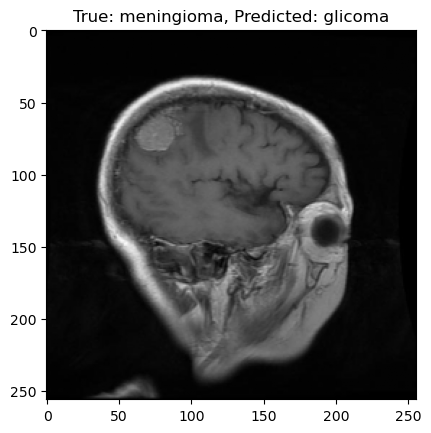

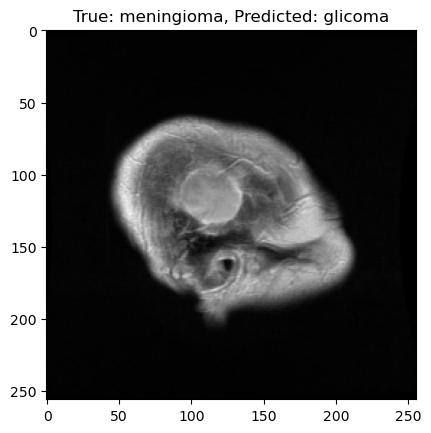

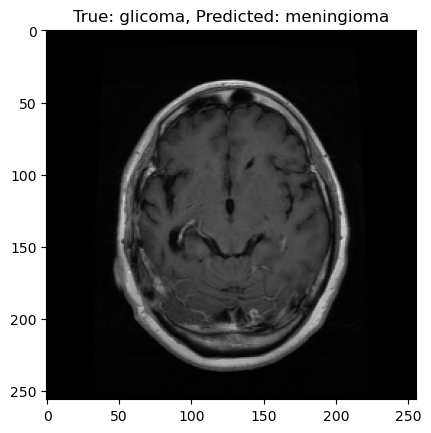

In [22]:
label_mapping = {0: 'glicoma', 1 : 'meningioma', 2 : 'notumor', 3 : 'pituitary'}
true_label_named = [label_mapping[label] for label in true_labels]
pred_label_named = [label_mapping[label] for label in predicted_labels]

# general misclassifications
for i in misclassified_indices[:3]:  
    plt.imshow(X_test[i], cmap='gray')  
    plt.title(f"True: {true_label_named[i]}, Predicted: {pred_label_named[i]}")
    plt.show()

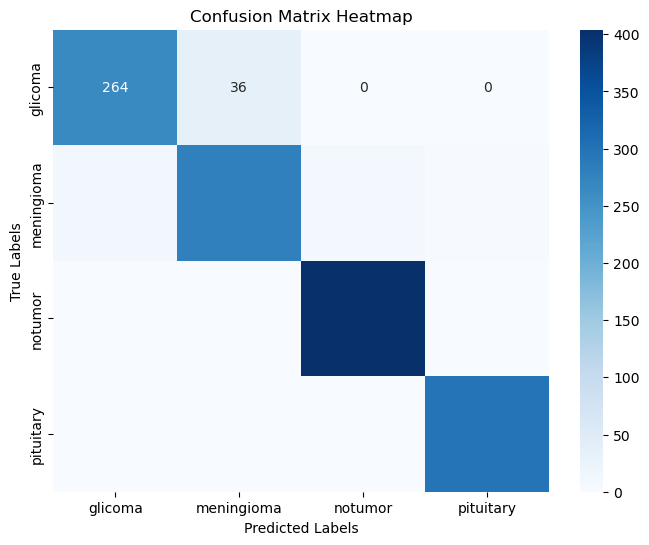

In [20]:
conf_matrix = confusion_matrix(true_label_named, pred_label_named)
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.values(), yticklabels=label_mapping.values(), cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

A major point of success is that there were no false negatives for "notumor" through this model, with 95% accuracy. The primary weakness is misclassifying glicomas as meningiomas. Further optimization could be done in preprocessing, removing the black edges of the images so that only the brain is visible.